<a href="https://colab.research.google.com/github/Abhinash200301/Machine---Learning---Project---5/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Please provide the input path of the 1st image


/content/freezer_image (1).jpg


Please provide the input path of the 2nd image


/content/freezer_image (2).jpg


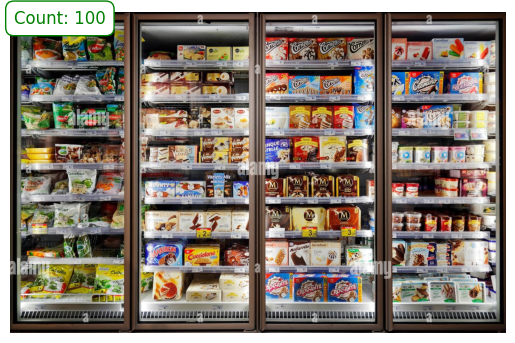

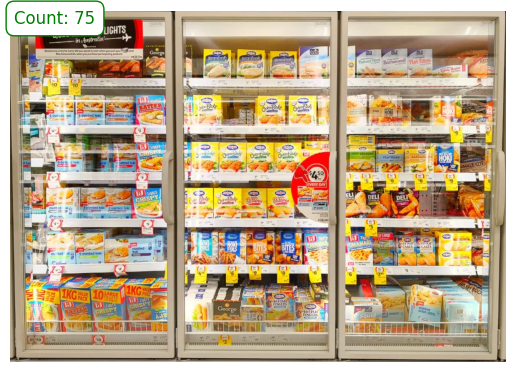

In [7]:
import cv2
import torch
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
import matplotlib.pyplot as plt

# Load pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transforms.ToTensor()(image)
    image_tensor = image_tensor.unsqueeze(0)
    return image, image_tensor

# Perform object detection
def detect_objects(image_tensor):
    with torch.no_grad():
        predictions = model(image_tensor)
    return predictions[0]

# Count the number of items
def count_items(predictions):
    return len(predictions['boxes'])

# Display the count on the image
def display_count(image, count):
    plt.imshow(image)
    plt.axis('off')
    plt.text(10, 30, f"Count: {count}", color='green', fontsize=12, bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
    plt.show()

# Provide the path to the image

print("Please provide the input path of the 1st image")

print('\n')

image_path_1 = input()

print('\n')

print("Please provide the input path of the 2nd image")

print('\n')

image_path_2 = input()

# Load and preprocess the image
image_1, image_tensor_1 = load_image(image_path_1)
image_2, image_tensor_2 = load_image(image_path_2)

# Perform object detection
predictions_1 = detect_objects(image_tensor_1)
predictions_2 = detect_objects(image_tensor_2)

# Count the number of items
item_count_1 = count_items(predictions_1)
item_count_2 = count_items(predictions_2)

# Display the count on the image
display_count(image_1, item_count_1)
display_count(image_2, item_count_2)
